This python notebook is written for taking a session on Machine Learning for ACM Chapter. this tutorial assumes you to have basic understanding of Python, Data Structures, Discrete Mathematics and basic numpy and matplotlib operations. I have also assumed that users will have basic understanding of statistics and probability.

### Importing Libraries and Modules
We need certain libraries for everything we do in python, some are already imported while we have to import others.
We will work with NumPy, sklearn and Matplotlib libraries.

In [1]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

### Define Data
We are using Numpy array, you can find basic instructions on Numpy in Basics section of the Repository [PythonRobotics](https://github.com/akhilesh-k/PythonRobotics) on my GitHub [profile](https://github.com/akhilesh-k)

In [2]:
data = np.array([[3, -1.5,  2, -5.4], [0,  4,  -0.3, 2.1], [1,  3.3, 
-1.9, -4.3]])

### Mean Removal
We remove mean from each feature so that it's value is centred on zero, basically it removes bias from the features.

In [3]:
data_standardized = preprocessing.scale(data)
print ("\nMean =", data_standardized.mean(axis=0))
print ("Std deviation =", data_standardized.std(axis=0))


Mean = [ 5.55111512e-17 -1.11022302e-16 -7.40148683e-17 -7.40148683e-17]
Std deviation = [1. 1. 1. 1.]


### Scaling 
The
 values of each feature in a datapoint can vary between random values

In [4]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled = data_scaler.fit_transform(data)
print ("\nMin max scaled data =", data_scaled)


Min max scaled data = [[1.         0.         1.         0.        ]
 [0.         1.         0.41025641 1.        ]
 [0.33333333 0.87272727 0.         0.14666667]]


### Normalization
Data 
normalization is used when you want to adjust the values in the feature vector so that 
they can be measured on a common scale

In [5]:
data_normalized=preprocessing.normalize(data,norm='l1')
print("\nL1 normalized data =", data_normalized)


L1 normalized data = [[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]


### Binarization
Binarization 
is used when you want to convert your numerical feature vector into a Boolean 
vector.

In [6]:
data_binarized = preprocessing.Binarizer(threshold=1.4).transform(data)
print ("\nBinarized data =", data_binarized)


Binarized data = [[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]


### Data Encoding
**The One Hot Encoding**<br>
We have sparse and scattered data lot of time and this is when we need to tighten the feature vector 

In [7]:
encoder=preprocessing.OneHotEncoder()
encoder.fit([[0, 2, 1, 12], [1, 3, 5, 3], [2, 3, 2, 12], [1, 2, 4, 3]])
encoded_vector = encoder.transform([[2, 3, 5, 3]]).toarray()
print ("\nEncoded vector =", encoded_vector)


Encoded vector = [[0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]]


### Label Encoding
We need to read various lables which can be read by us easily and is used frequently in various ML algorithm.

In [8]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
input_classes=['acm','ece','ieee','cse','it','csi']
label_encoder.fit(input_classes)
print("\nClass Mapping:")
for i, item in enumerate(label_encoder.classes_):
    print (item, '---->',i)


Class Mapping:
acm ----> 0
cse ----> 1
csi ----> 2
ece ----> 3
ieee ----> 4
it ----> 5


In [9]:
labels=['acm','ece','cse']
encoded_labels=label_encoder.transform(labels)
print("\nLabels=",labels)
print("Encoded Labels=", list(encoded_labels))


Labels= ['acm', 'ece', 'cse']
Encoded Labels= [0, 3, 1]


In [10]:
encoded_labels = [2, 1, 0, 3, 1]
decoded_labels = label_encoder.inverse_transform(encoded_labels)
print ("\nEncoded labels =", encoded_labels)
print ("Decoded labels =", list(decoded_labels))


Encoded labels = [2, 1, 0, 3, 1]
Decoded labels = ['csi', 'cse', 'acm', 'ece', 'cse']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Building Linear Regressor
Import numpy library

In [ ]:
import sys
import numpy as np

Doing file Operations.

In [13]:
filename = "data_singlevar.txt"
X = []
y = []
with open(filename, "r") as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

Creating Numpy training object!

In [14]:

num_training = int(0.8 * len(X))
num_test = len(X) - num_training


Training and testing model with the given data

In [15]:

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])
# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

Creating Linear Regressor

In [17]:

from sklearn import linear_model
# Create linear regression object
linear_regressor = linear_model.LinearRegression()
# Train the model using the training sets
linear_regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Plotting Operations using Matplotlib

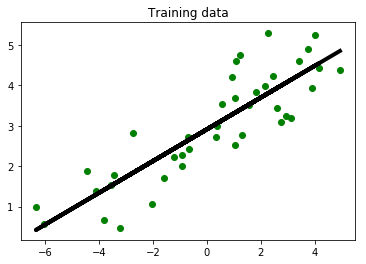

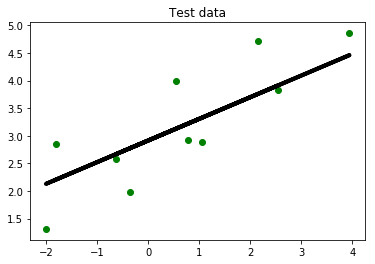

In [18]:
import matplotlib.pyplot as plt
y_train_pred = linear_regressor.predict(X_train)
plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')
plt.show()
y_test_pred = linear_regressor.predict(X_test)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Test data')
plt.show()

In [22]:
import sklearn.metrics as sm
print ("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print ("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print ("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print ("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print ("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 0.54
Mean squared error = 0.38
Median absolute error = 0.54
Explained variance score = 0.68
R2 score = 0.68
